In [43]:
import numpy as np
import pandas as pd
import tensorflow as tf

import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [33]:
def get_mnist():
    df = pd.read_csv('./mnist_train.csv')
    data = df.as_matrix().astype(np.float32)
    np.random.shuffle(data)
    X = data[:, 1:]
    
    # Compute the mean
    mu = X.mean(axis=0)
    
    # Compute the standard deviation
    std = X.std(axis=0)
    np.place(std, std == 0, 1)
    
    # Normalize the data
    X = (X - mu) / std 
    
    # Arrage the classes
    classes = data[:, 0]
    
    Y = np.zeros((len(classes), 10))
    for i in range(len(classes)):
        Y[i, int(classes[i])] = 1
    
    return X, Y

X_data, Y_data = get_mnist()

In [17]:
def error_rate(p, t):
    return np.mean(p != t)

In [42]:
MAX_ITER = 20
PRINT_STEP = 10
LEARNING_RATE = 0.00004
REGULARIZATION = 0.01
BATCH_SIZE = 500
TEST_SIZE = 1000

# Training data
X_train = X_data[:-TEST_SIZE]
Y_train = Y_data[:-TEST_SIZE]

# Test data
X_test = X_data[-TEST_SIZE:]
Y_test = Y_data[-TEST_SIZE:]

N, D = X_train.shape
N_BATCHES = int(N / BATCH_SIZE)


N_HIDDEN1 = 300
N_HIDDEN2 = 100
N_OUTPUT = 10

W1_init = np.random.randn(D, N_HIDDEN1) / 28
b1_init = np.zeros(N_HIDDEN1)

W2_init = np.random.randn(N_HIDDEN1, N_HIDDEN2) / np.sqrt(N_HIDDEN1)
b2_init = np.zeros(N_HIDDEN2)

W3_init = np.random.randn(N_HIDDEN2, N_OUTPUT) / np.sqrt(N_HIDDEN2)
b3_init = np.zeros(N_OUTPUT)


Iteration=0, Batch=0, Cost=2323.615, Error=0.886
Iteration=0, Batch=10, Cost=1511.196, Error=0.378
Iteration=0, Batch=20, Cost=875.484, Error=0.218
Iteration=0, Batch=30, Cost=591.682, Error=0.153
Iteration=0, Batch=40, Cost=463.046, Error=0.117
Iteration=0, Batch=50, Cost=405.884, Error=0.108
Iteration=0, Batch=60, Cost=373.954, Error=0.099
Iteration=0, Batch=70, Cost=344.272, Error=0.095
Iteration=0, Batch=80, Cost=323.761, Error=0.084
Iteration=1, Batch=0, Cost=320.476, Error=0.085
Iteration=1, Batch=10, Cost=304.648, Error=0.083
Iteration=1, Batch=20, Cost=295.496, Error=0.083
Iteration=1, Batch=30, Cost=282.710, Error=0.078
Iteration=1, Batch=40, Cost=268.606, Error=0.075
Iteration=1, Batch=50, Cost=259.660, Error=0.069
Iteration=1, Batch=60, Cost=254.130, Error=0.070
Iteration=1, Batch=70, Cost=245.670, Error=0.066
Iteration=1, Batch=80, Cost=242.114, Error=0.070
Iteration=2, Batch=0, Cost=240.839, Error=0.071
Iteration=2, Batch=10, Cost=236.621, Error=0.067
Iteration=2, Batch=20

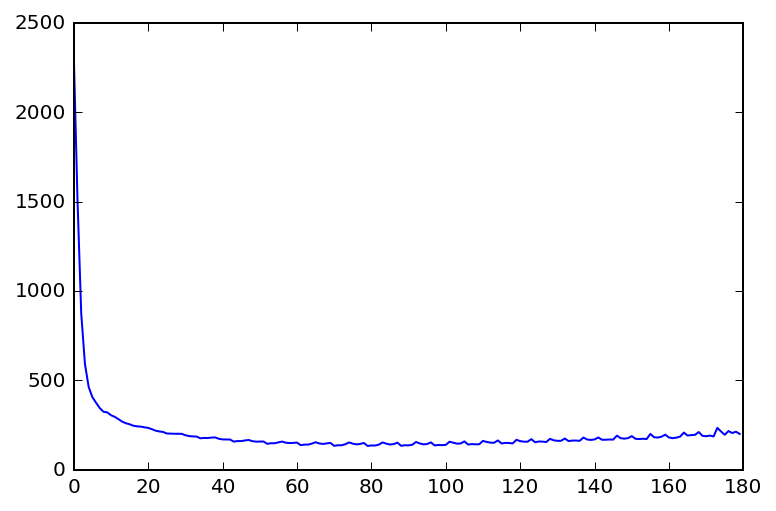

In [44]:
X = tf.placeholder(tf.float32, shape=(None, D), name='X')
T = tf.placeholder(tf.float32, shape=(None, N_OUTPUT), name='T')

W1 = tf.Variable(W1_init.astype(np.float32))
b1 = tf.Variable(b1_init.astype(np.float32))
W2 = tf.Variable(W2_init.astype(np.float32))
b2 = tf.Variable(b2_init.astype(np.float32))
W3 = tf.Variable(W3_init.astype(np.float32))
b3 = tf.Variable(b3_init.astype(np.float32))

Z1 = tf.nn.relu(tf.matmul(X, W1) + b1)
Z2 = tf.nn.relu(tf.matmul(Z1, W2) + b2)
Youtput = tf.matmul(Z2, W3) + b3

cost = tf.reduce_sum(tf.nn.softmax_cross_entropy_with_logits(Youtput, T))

train_op = tf.train.RMSPropOptimizer(LEARNING_RATE, decay=0.99, momentum=0.9).minimize(cost)

predict_op = tf.argmax(Youtput, 1)

# LogLikelihood array for plotting
LL = []

init = tf.global_variables_initializer()

with tf.Session() as session:
    session.run(init)
    
    for i in range(MAX_ITER):
        for b in range(N_BATCHES):
            X_batch = X_train[b * BATCH_SIZE:(b+1) * BATCH_SIZE]
            Y_batch = Y_train[b * BATCH_SIZE:(b+1) * BATCH_SIZE]
            
            session.run(train_op, feed_dict={X: X_batch, T: Y_batch})
            
            if not b % PRINT_STEP:
                test_cost = session.run(cost, feed_dict={X: X_test, T: Y_test})
                prediction = session.run(predict_op, feed_dict={X: X_test})
                expected = np.argmax(Y_test, axis=1)
                err = error_rate(prediction, expected)
                LL.append(test_cost)
                print("Iteration=%d, Batch=%s, Cost=%.3f, Error=%.3f" % (i, b, test_cost, err))
                
                
    plt.plot(LL)
    plt.show()
    